# Writing a Web Scraper

## 1. Make an HTTP request to get the HTML of a webpage

The table on the webpage https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2019&p=.htm shows the movies in 2019 YTD with the biggest sales worldwide. I use an ipywidget to display the webpage here in the notebook:

In [1]:
import requests
import ipywidgets as widgets

boxofficewebpage = widgets.HTML()
boxofficewebpage.value = requests.get('https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2019&p=.htm').text
#boxofficewebpage.layout.height = '800px'
boxofficewebpage

HTML(value='<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.d…

--

--

The code cell above already loads the webpage HTML, but only in the HTML widget object. I request the HTML again, this time without the widget:

In [2]:
webpage = requests.get('https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2019&p=.htm')
html = webpage.content

## 2. Make the HTML queryable using BeautifulSoup or PyQuery

Now we use a library such as BeautifulSoup or PyQuery to query the HTML:

In [3]:
from bs4 import BeautifulSoup

In the following, let's say we only want to Top 100 movie titles:

In [4]:
soup = BeautifulSoup(html, 'html.parser')

By looking at the wepage you can realize that the table content all has the same font size. You can use such similarity to filter out only the relevant HTML from a page by using the `search` or `find` functions of your library. In this case I recognize, by looking at the source code of the webpage, that all table content has font size 2:

In [5]:
rows = soup.find_all('font', attrs={'size':'2'})

A preview of the results:

In [6]:
rows[:3]

[<font face="Verdana" size="2"><a href="/about/adjuster.htm"><b>Adjuster:</b></a></font>,
 <font size="2"><a href="/yearly/chart/?view2=worldwide&amp;yr=2019&amp;sort=rank&amp;order=ASC&amp;p=.htm">Rank</a></font>,
 <font size="2"><a href="/yearly/chart/?view2=worldwide&amp;yr=2019&amp;sort=title&amp;order=ASC&amp;p=.htm">Title (click to view)</a></font>]

### Movie Titles

Finally to only get the relevant information from the HTML of the website, we look for certain `children` in each row. For example we can look for the child with the HTML tag `a`. This tag contains the movie title:

In [7]:
rows[10].find('a').get_text()

'Avengers: Endgame'

Now let's run a loop to extract all of the movie titles:

In [8]:
movie_titles_html = []
for row in rows:
    movie_titles_html.extend(row.find_all('a'))

In [9]:
movie_titles = []
for text in movie_titles_html:
    a = text.get_text()
    movie_titles.append(a)

However, the first 10 results are not movie titles, and we only want the top 100 titles so I slice the resulting list to only get the wanted movie titles:

In [10]:
movie_titles = movie_titles[10:110]

### Worldwide Revenue

In [11]:
movie_revenues_html = []
for row in rows:
    revenue = movie_revenues_html.extend(row.find_all('b'))

In [12]:
movie_revenues = []
for item in movie_revenues_html:
    a = item.get_text()
    movie_revenues.append(a)

In [13]:
movie_revenues = movie_revenues[2:]
movie_revenues = movie_revenues[1::2]
movie_revenues_final = movie_revenues[:100]

## 3. Explore the Data

We can now use our resulting dataset to do some exploratory data anaylsis:. To do that I first create a Pandas DataFrame with the two lists from above:

In [14]:
import pandas as pd
movies = pd.DataFrame({'MovieTitles' : movie_titles, 'Revenue': movie_revenues_final})
movies.Revenue = movies.Revenue.str.replace('$', '')
movies.Revenue = movies.Revenue.str.replace(',', '')
series = pd.to_numeric(movies.Revenue)
movies.Revenue = series
movies.head()

,MovieTitles,Revenue
0,Avengers: Endgame,2796.0
1,The Lion King (2019),1465.7
2,Captain Marvel,1128.3
3,Spider-Man: Far from Home,1110.7
4,Aladdin (2019),1040.5


Let's plot the first 10 movies:

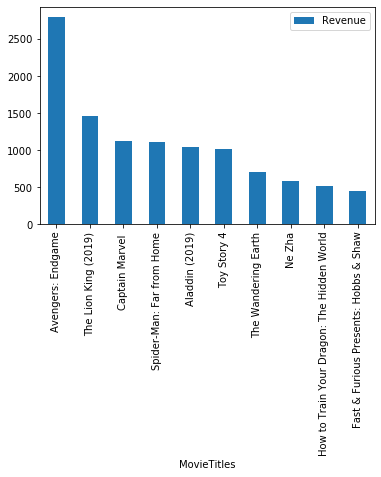

In [15]:
movies.set_index('MovieTitles', inplace=True)
%matplotlib inline
import matplotlib.pyplot as plt
movies[:10].plot.bar()